In [1]:
#Make R-R plot

In [2]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

import math

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")





Welcome to JupyROOT 6.16/00
Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#
def Get_RinRout_ZinDT(filename):
    file = open(filename, 'r')

    lines = file.read().splitlines()
    last_line = lines[-1]

    #print lines[2]
    if last_line.startswith("*"):
        last_line = lines[-2]
        a= last_line.split("\t\t")
        #print a
        rIN= float(a[0])
        zIN= float(a[1])
        DT = -999.
        rOUT=float(a[0])-999.
    else:
        a= last_line.split("\t\t")
        rIN= float(a[0])
        zIN= float(a[1])
        DT = float(a[2])
        rOUT=float(a[3])
    return rIN, rOUT, zIN, DT


def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        elif lines[i].startswith('*'):
            print lines[i]
        elif lines[i].startswith('0') or lines[i].startswith('1') or lines[i].startswith('2')\
        or lines[i].startswith('3') or lines[i].startswith('4') or lines[i].startswith('5')\
        or lines[i].startswith('6') or lines[i].startswith('7') or lines[i].startswith('8')\
        or lines[i].startswith('9'):
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
        else:
            continue
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)

def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us

print "\n\t...Done!"


	...Done!


In [4]:
#Get last element in file list. Find the drift line which ends at r=0, 10, 20, 30, 40, 50, 60, 70

"""
minVal = 999.
find = 60.
index = 100000
for i in range(0, len(file_list)):
    if i % 10000 == 0:
        print str(i)+" / "+str(len(file_list))
    if file_list[i].endswith("_z02.0cm_0506.txt"):
        a = Get_RinRout_ZinDT(file_list[i])
        if math.isnan(a[0]) or math.isnan(a[1]):
            continue
        elif math.isnan(a[2]) or math.isnan(a[3]):
            continue    
        elif a[3] < -100 or a[2] < -100:
            continue
        else:        
            r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list[i], -1)
            temp = pow(r_cm - find, 2)
            if temp < minVal:
                minVal = temp
                index =i
                if temp ==0:
                    break

    #if i > 500:
    #    print file_list_Dense[i]

r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list[index], -1)
print "index = "+str(index)
print "file_list[index] = "+str(file_list[index]) 
print "final r = "+str(r_cm)

"""

'\nminVal = 999.\nfind = 60.\nindex = 100000\nfor i in range(0, len(file_list)):\n    if i % 10000 == 0:\n        print str(i)+" / "+str(len(file_list))\n    if file_list[i].endswith("_z02.0cm_0506.txt"):\n        a = Get_RinRout_ZinDT(file_list[i])\n        if math.isnan(a[0]) or math.isnan(a[1]):\n            continue\n        elif math.isnan(a[2]) or math.isnan(a[3]):\n            continue    \n        elif a[3] < -100 or a[2] < -100:\n            continue\n        else:        \n            r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list[i], -1)\n            temp = pow(r_cm - find, 2)\n            if temp < minVal:\n                minVal = temp\n                index =i\n                if temp ==0:\n                    break\n\n    #if i > 500:\n    #    print file_list_Dense[i]\n\nr_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list[index], -1)\nprint "index = "+str(index)\nprint "file_list[index] = "+str(file_list[index]) \nprint "final r = "+str(r_cm)\n\n'

In [5]:
#Grab a few Drift lines
filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r00cm_z140cm_0507.txt"
r_cm_list_0, z_cm_list_0, DriftTime_us_list_0 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r10cm_z140cm_0507.txt"
r_cm_list_10, z_cm_list_10, DriftTime_us_list_10 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r20cm_z140cm_0507.txt"
r_cm_list_20, z_cm_list_20, DriftTime_us_list_20 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r30cm_z140cm_0507.txt"
r_cm_list_30, z_cm_list_30, DriftTime_us_list_30 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r40cm_z140cm_0507.txt"
r_cm_list_40, z_cm_list_40, DriftTime_us_list_40 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r50cm_z140cm_0507.txt"
r_cm_list_50, z_cm_list_50, DriftTime_us_list_50 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r60cm_z140cm_0507.txt"
r_cm_list_60, z_cm_list_60, DriftTime_us_list_60 = Get_drift_line_arrays(filename)

filename="/data/rossiter/lz/mdc2_ReverseDriftMap_200507/SingleDriftLineCalc_TimeStep_0.1us_r70cm_z140cm_0507.txt"
r_cm_list_70, z_cm_list_70, DriftTime_us_list_70 = Get_drift_line_arrays(filename)



**IF BOUNDARY

**IF BOUNDARY

**IF BOUNDARY

**IF BOUNDARY

**IF BOUNDARY

**IF TIME ELAPSED

**IF TIME ELAPSED

**IF TIME ELAPSED



In [6]:
#Grab a few Drift lines
"""
filename=directory+"SingleDriftLineCalc_.05cm_r02.0cm_z02.0cm_0506.txt"
r_cm_list_0, z_cm_list_0, DriftTime_us_list_0 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r12.0cm_z02.0cm_0506.txt"
r_cm_list_10, z_cm_list_10, DriftTime_us_list_10 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r22.0cm_z02.0cm_0506.txt"
r_cm_list_20, z_cm_list_20, DriftTime_us_list_20 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r32.0cm_z02.0cm_0506.txt"
r_cm_list_30, z_cm_list_30, DriftTime_us_list_30 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r42.0cm_z02.0cm_0506.txt"
r_cm_list_40, z_cm_list_40, DriftTime_us_list_40 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r52.0cm_z02.0cm_0506.txt"
r_cm_list_50, z_cm_list_50, DriftTime_us_list_50 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r62.0cm_z02.0cm_0506.txt"
r_cm_list_60, z_cm_list_60, DriftTime_us_list_60 = Get_drift_line_arrays(filename)

filename=directory+"SingleDriftLineCalc_.05cm_r72.0cm_z02.0cm_0506.txt"
r_cm_list_70, z_cm_list_70, DriftTime_us_list_70 = Get_drift_line_arrays(filename)
"""

'\nfilename=directory+"SingleDriftLineCalc_.05cm_r02.0cm_z02.0cm_0506.txt"\nr_cm_list_0, z_cm_list_0, DriftTime_us_list_0 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_r12.0cm_z02.0cm_0506.txt"\nr_cm_list_10, z_cm_list_10, DriftTime_us_list_10 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_r22.0cm_z02.0cm_0506.txt"\nr_cm_list_20, z_cm_list_20, DriftTime_us_list_20 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_r32.0cm_z02.0cm_0506.txt"\nr_cm_list_30, z_cm_list_30, DriftTime_us_list_30 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_r42.0cm_z02.0cm_0506.txt"\nr_cm_list_40, z_cm_list_40, DriftTime_us_list_40 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_r52.0cm_z02.0cm_0506.txt"\nr_cm_list_50, z_cm_list_50, DriftTime_us_list_50 = Get_drift_line_arrays(filename)\n\nfilename=directory+"SingleDriftLineCalc_.05cm_

In [19]:
#Get all files from drift map
from os import listdir
from os.path import isfile, join

mypath = "/data/rossiter/lz/mdc2_DriftMap_200506/"

file_list = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [25]:
filename = mypath+file_list[200]
print filename
file = open(filename, 'r')

lines = file.read().splitlines()
last_line = lines[-2]

print lines[2]

a= last_line.split("\t\t")
rIN= float(a[0])
zIN= float(a[1])
DT = float(a[2])
rOUT=float(a[3])

print a


/data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r06.8cm_z00.5cm_0506.txt
#rIN_cm		zIN_cm		DriftTimeIN_us	rOUT_cm		z_OUT_cm#
['6.8', '0.5', '5.47157', '6.10506', '-0.0415508']


In [26]:
#
rIN_cm_list =[]
rOUT_cm_list =[]
zIN_cm_list =[]
DTout_us_list =[]

badR_list = []
badZ_list = []
counter = 0
for f in file_list:
    if counter % 10000 == 0:
        print str(counter)+" / "+str(len(file_list))
    counter +=1
    a = Get_RinRout_ZinDT(mypath+f)
    if math.isnan(a[0]) or math.isnan(a[1]):
        print "Very bad file: "+str(mypath+f)
    elif math.isnan(a[2]) or math.isnan(a[3]):
        badR_list.append(a[0])
        badZ_list.append(a[2])    
    elif a[3] < -100 or a[2] < -100:
        badR_list.append(a[0])
        badZ_list.append(a[2])

    else:
        rIN_cm_list.append(a[0])
        rOUT_cm_list.append(a[1])
        zIN_cm_list.append(a[2])
        DTout_us_list.append(a[3])
        
        

print len(rIN_cm_list)

#Put data into dictionary
"""
data = {'rIN_cm':-1, 'rOUT_cm':-1, 'zIN_cm':-1, 'DT_us':-1 }

data['rIN_cm']=rIN_cm_list
data['rOUT_cm']=rOUT_cm_list
data['zIN_cm']=zIN_cm_list
data['DT_us']=DTout_us_list
"""
#keys = ['rIN_cm', 'rOUT_cm', 'zIN_cm', 'DT_us']
#values = [rIN_cm_list, rOUT_cm_list, zIN_cm_list, DTout_us_list]
#data = dict(zip(keys, values))

print "max = "+str(max(np.asarray(rIN_cm_list) - np.asarray(rOUT_cm_list)))
print "mean = "+str(np.mean(np.asarray(rIN_cm_list) - np.asarray(rOUT_cm_list)))
print "min = "+str(min(np.asarray(rIN_cm_list) - np.asarray(rOUT_cm_list)))


print "\n\t...Done!"

0 / 53620
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z00.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z00.5cm_0506.txt
10000 / 53620
20000 / 53620
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z51.0cm_0506.txt
30000 / 53620
40000 / 53620
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z58.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z78.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z63.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z61.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z61.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z64.0c

Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z121.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z114.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z116.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z119.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z116.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z118.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z121.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z29.0cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_200506/SingleDriftLineCalc_.05cm_r72.8cm_z113.5cm_0506.txt
Very bad file: /data/rossiter/lz/mdc2_DriftMap_

387


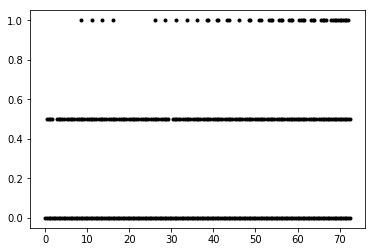

In [27]:
print len(badR_list)
figure(1)
plt.plot(badR_list, badZ_list, '.k')

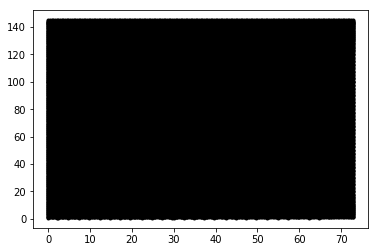

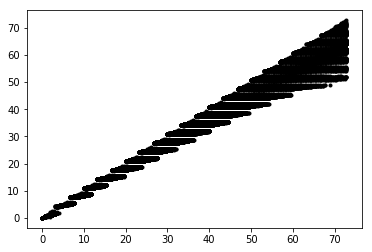

In [28]:
#cut = (data['rIN_cm']>50.)

figure(1)
plt.plot(rIN_cm_list, zIN_cm_list, '.k')

figure(2)
plt.plot(rIN_cm_list, rOUT_cm_list, '.k')

			##############
			#RADIAL SHIFT#
			##############


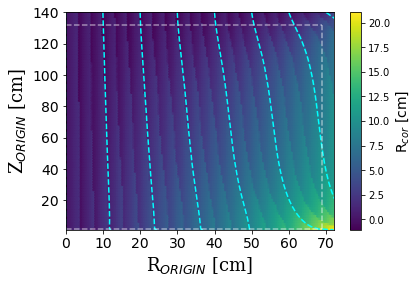

In [35]:
gridsize=150
figure(1)
plt.hexbin(rIN_cm_list, zIN_cm_list, C=(np.asarray(rIN_cm_list) - np.asarray(rOUT_cm_list)), gridsize=gridsize, cmap='viridis', bins=None)
plt.colorbar().set_label('R$_{cor}$ [cm]', size=14)
#fig.colorbar(surf, shrink=0.5, aspect=5).set_label('E$_{Z}$ [V/cm]', size=size1)

plt.ylabel('Z$_{ORIGIN}$ [cm]',fontsize=18,family='serif')
plt.xlabel('R$_{ORIGIN}$ [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(r_cm_list_0, z_cm_list_0, '--', color='aqua')
plt.plot(r_cm_list_10, z_cm_list_10, '--', color='aqua')
plt.plot(r_cm_list_20, z_cm_list_20, '--', color='aqua')
plt.plot(r_cm_list_30, z_cm_list_30, '--', color='aqua')
plt.plot(r_cm_list_40, z_cm_list_40, '--', color='aqua')
plt.plot(r_cm_list_50, z_cm_list_50, '--', color='aqua')
plt.plot(r_cm_list_60, z_cm_list_60, '--', color='aqua')
plt.plot(r_cm_list_70, z_cm_list_70, '--', color='aqua')

plt.plot([68.8,68.8], [1.5,132.1], '--', c='white', alpha=.5, label='Fiducial Boundary')
plt.plot([0,68.8], [132.1,132.1], '--', c='white', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='white', alpha=.5)

plt.plot([73.01, 73.01], [0, 145.55], '-', c='red', alpha=.5, label='LXe Boundary')
plt.plot([0, 73.01], [145.55, 145.55], '-', c='red', alpha=.5)

plt.xlim(0, 72)
plt.ylim(1, 140)

print "\t\t\t##############\n\t\t\t#RADIAL SHIFT#\n\t\t\t##############"

			############
			#DRIFT TIME#
			############


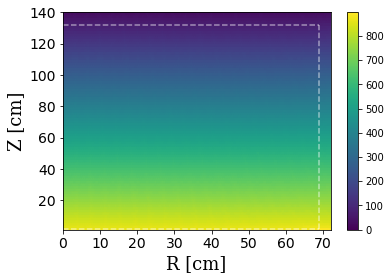

In [30]:
gridsize=150
figure(1)
plt.hexbin(rIN_cm_list, zIN_cm_list, C=DTout_us_list, gridsize=gridsize, cmap='viridis', bins=None)
plt.colorbar()

plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot([68.8,68.8], [1.5,132.1], '--', c='white', alpha=.5, label='Fiducial Boundary')
plt.plot([0,68.8], [132.1,132.1], '--', c='white', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='white', alpha=.5)

plt.plot([73.01, 73.01], [0, 145.55], '-', c='red', alpha=.5, label='LXe Boundary')
plt.plot([0, 73.01], [145.55, 145.55], '-', c='red', alpha=.5)

plt.xlim(0, 72)
plt.ylim(1, 140)

print "\t\t\t############\n\t\t\t#DRIFT TIME#\n\t\t\t############"

In [31]:
#Write driftmap out to txt file
filename = "MDC2_DriftMap_200513.txt"
f = open(filename, "w")
f.write("#rIN_cm\tzIN_cm\trOUT_cm\tDT_us\n")
for i in range(0,len(rIN_cm_list)):
    if i%10000 ==0:
        print str(i)+" / "+str(len(rIN_cm_list))
    f.write(str(rIN_cm_list[i])+"\t"+str(zIN_cm_list[i])+"\t"+str( rOUT_cm_list[i] )+"\t"+str( DTout_us_list[i] )+"\n")
f.close()

print "Done"

0 / 53141
10000 / 53141
20000 / 53141
30000 / 53141
40000 / 53141
50000 / 53141
Done


In [32]:

print "rIN_cm\tzIN_cm\trOUT_cm\tDT_us"
for i in range(0,10):
    print str(rIN_cm_list[i])+"\t"+str(zIN_cm_list[i])+"\t"+str( rOUT_cm_list[i] )+"\t"+str( DTout_us_list[i] )

rIN_cm	zIN_cm	rOUT_cm	DT_us
0.0	0.5	0.0	872.09
2.0	0.5	0.460422	873.29
2.4	0.5	1.65578	874.455
4.8	0.5	4.6392	871.234
7.2	0.5	5.22321	872.535
9.6	0.5	7.93928	872.777
12.4	0.5	11.368	872.92
14.8	0.5	11.9184	872.901
17.2	0.5	14.6002	872.103
19.6	0.5	15.1651	874.253


In [33]:
print len(rIN_cm_list)

53141


In [34]:
print 146.1/.18

811.666666667
